In [129]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [155]:
df = pd.DataFrame(columns=['word_id', 'text', 'x', 'y', 'width', 'height' ])

path = 'test/'
for file in os.listdir(path):
    if(str(file)[-3:] == 'xml'):
        tree = ET.parse(str(os.path.join(path, file)))
        root = tree.getroot() 
        for line in root.findall('lines'):
            for word in line.findall('words'):
                word_id = word.find('word-id').text
                text = word.find('text').text
                x = int(word.find('x').text)
                y = int(word.find('y').text)
                width = int(word.find('width').text)
                height = int(word.find('height').text)
                d = {'word_id': word_id, 'text': text, 'x': x, 'y': y, 'width': width, 'height': height}
                df = df.append(d, ignore_index=True)

df.head()

,word_id,text,x,y,width,height
0,HIN_P_WP_0000_00_00,﻿अंतरराष्ट्रीय,26,182,81,20
1,HIN_P_WP_0000_00_01,संबंध,111,184,36,19
2,HIN_P_WP_0000_00_02,में,152,178,17,21
3,HIN_P_WP_0000_00_03,राष्ट्र,177,181,24,17
4,HIN_P_WP_0000_00_04,"राज्यों,",209,176,38,22


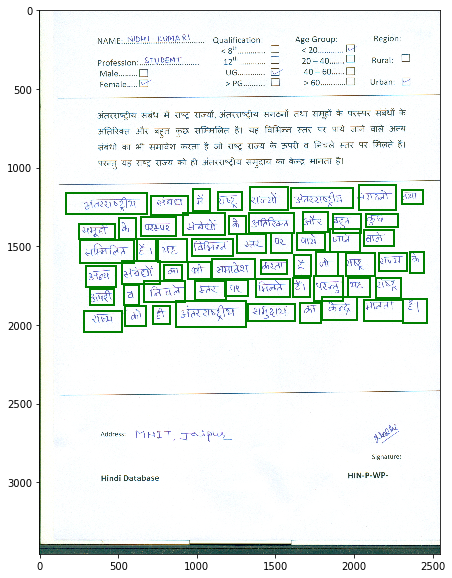

In [209]:
file = np.random.choice(df.word_id)
im = skimage.io.imread('test/HIN_P_WP_0000.png')
plt.figure(figsize=(10,10))
plt.imshow(im)

current_axis = plt.gca()

shift_factor = 6.4

for i in range(len(df)):
    if df['word_id'][i][:-6] == 'HIN_P_WP_0000':
        label = df['text'][i].strip()
        current_axis.add_patch(Rectangle((df['x'][i]*shift_factor, df['y'][i]*shift_factor),
                                         df['width'][i]*shift_factor, df['height'][i]*shift_factor,
                                         edgecolor = 'g', fill=False, linewidth=2)) 
        #current_axis.text(df['x'][i]*shift_factor, df['y'][i]*shift_factor,
                          #label, size='x-small', color='white', bbox={'facecolor':'red', 'alpha':0.5})
    
plt.show()